In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import dates as mdates
import seaborn as sns
import numpy as np

In [2]:
csv_zoneutilisation = r""
csv_allParkedCars = r""
csv_IllegalCarsInZone = r""

In [3]:
print(
 "\nparking pipeline."
 "\n   ___           __    _             ___                    __    _____                      __          "
 "\n  / _ \___ _____/ /__ (_)__  ___ _  / _ \___ ___  ___  ____/ /_  / ___/__ ___  ___ _______ _/ /____  ____"
 "\n / ___/ _ `/ __/  '_// / _ \/ _ `/ / , _/ -_) _ \/ _ \/ __/ __/ / (_ / -_) _ \/ -_) __/ _ `/ __/ _ \/ __/"
 "\n/_/   \_,_/_/ /_/\_\/_/_//_/\_, / /_/|_|\__/ .__/\___/_/  \__/  \___/\__/_//_/\__/_/  \_,_/\__/\___/_/   "
 "\n                           /___/          /_/                                       "         
)                                               
print("This script is meant to generate")
print("=="*50)
print("\n")


parking pipeline.
   ___           __    _             ___                    __    _____                      __          
  / _ \___ _____/ /__ (_)__  ___ _  / _ \___ ___  ___  ____/ /_  / ___/__ ___  ___ _______ _/ /____  ____
 / ___/ _ `/ __/  '_// / _ \/ _ `/ / , _/ -_) _ \/ _ \/ __/ __/ / (_ / -_) _ \/ -_) __/ _ `/ __/ _ \/ __/
/_/   \_,_/_/ /_/\_\/_/_//_/\_, / /_/|_|\__/ .__/\___/_/  \__/  \___/\__/_//_/\__/_/  \_,_/\__/\___/_/   
                           /___/          /_/                                       
This script is meant to generate




In [4]:
''' 
IMPORT AND CREATE GLOBAL FILTERS
'''

df_parkingSpaces = pd.read_csv(csv_zoneutilisation)

parking_type_mapping = {
    'white-single': 'white',
    'white-parallel-undivided': 'white',
    'white-undivided-angled': 'white',
    'yellow-single': 'yellow',
    'yellow-undivided': 'yellow',
    'bluebadge-communal': 'bluebadge',
    'bluebadge-reserved': 'bluebadge'
}

df_parkingSpaces['parking_group'] = df_parkingSpaces['type'].map(parking_type_mapping)
df_parkingSpaces['description'] = df_parkingSpaces['description'].fillna(df_parkingSpaces['parking_group'])

#remove motorcyle bays and busstops.. 
df_parkingSpaces = df_parkingSpaces[(df_parkingSpaces['description'] != 'mc') & (df_parkingSpaces['description'] != 'busstop')] 
#df_parkingSpaces = df_parkingSpaces.dropna(subset=['capacity'])

FileNotFoundError: [Errno 2] No such file or directory: ''

# 0. Parking capacity - Per Street

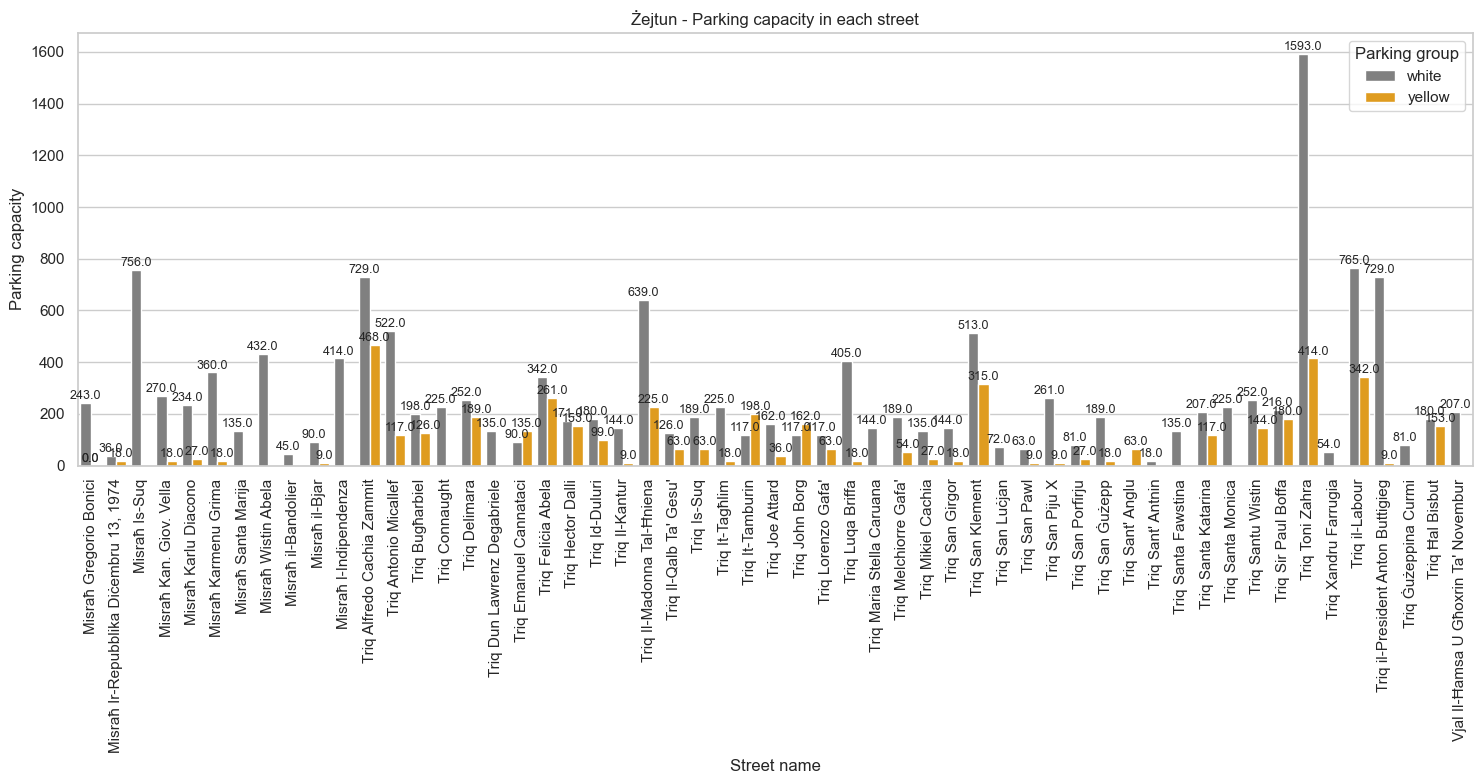

In [19]:
grouped_df = df_parkingSpaces.groupby(['street_name', 'parking_group'])['capacity'].sum().reset_index()
sns.set_theme(style='whitegrid')
# Define the colors for each parking_group
palette_colors = {
    'yellow': 'orange',  # Using orange for 'yellow' parking bays
    'white': 'grey',     # Using grey for 'white' parking bays
    'bluebadge': '#B0D5E5'  # Using blue for 'bluebadge' parking bays
}

# Now use seaborn to create the bar plot with specified colors.
plt.figure(figsize=(15, 8))
s = sns.barplot(data=grouped_df, x='street_name', y='capacity', hue='parking_group', palette=palette_colors)

plt.xlabel('Street name')
plt.ylabel('Parking capacity')
plt.title('Żejtun - Parking capacity in each street')
plt.legend(title='Parking group')
plt.xticks(rotation=90)  


for p in s.patches:
    s.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      size=9, xytext = (0, 5), 
                      textcoords = 'offset points')

plt.xticks(rotation=90)  # Rotate x-axis labels if needed

plt.tight_layout()  # Adjust layout to fit the figure properly
plt.show()

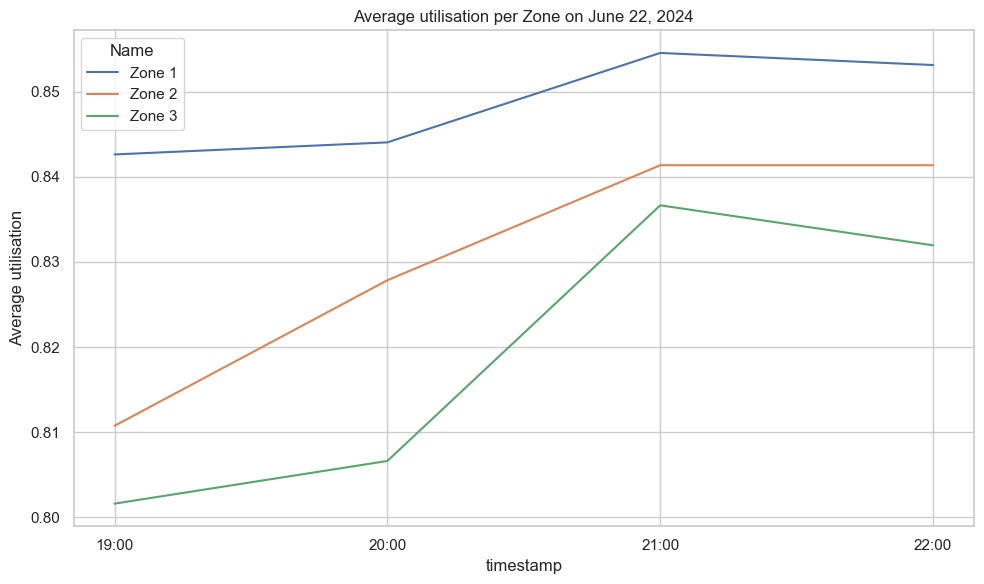

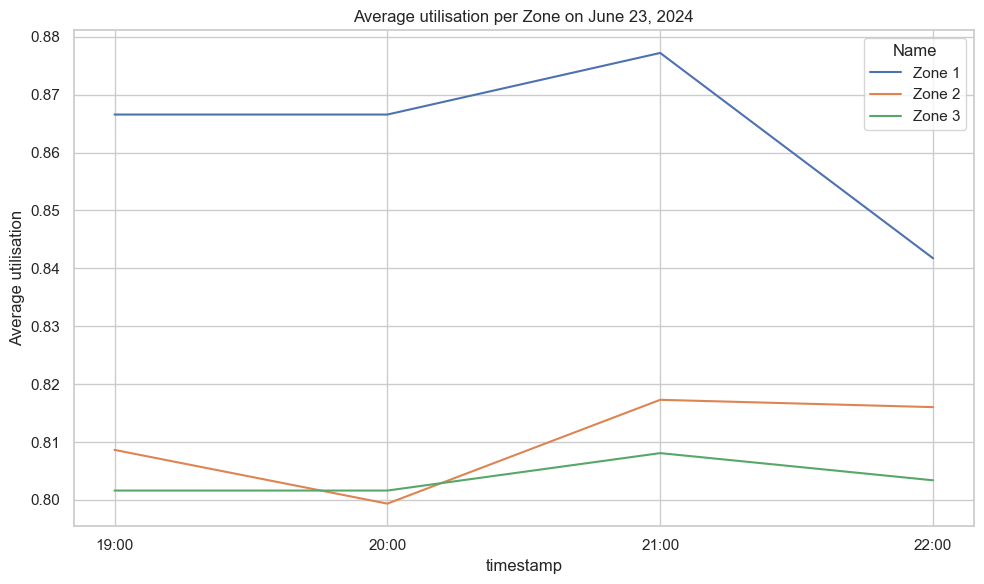

In [32]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming your DataFrame is named 'df'
# # 'Name' is the zone column, 'timestamp' is the time column, and 'utilisation' is the utilization column
# df = df_parkingSpaces

# df['type'] = df['type'].replace({
#     'white single': 'White bays',
#     'white parallel undivided': 'White bays',
#     'yellow single': 'Yellow bays',
#     'yellow undivided': 'Yellow bays'
# })

# df[df['type'] != 'mc']  # Remove 'mc' category
# df['type'] = df['type'].replace('bluebadge', 'Blue Badge')


# # Assuming your DataFrame is named 'df' and contains 'timestamp', 'Name', and 'utilisation'

# # Convert 'timestamp' to datetime if not already done
# df['timestamp'] = pd.to_datetime(df['timestamp'])

# # Filter data for June 22, 2024
# df_22nd = df[(df['timestamp'].dt.date == pd.to_datetime('2024-06-22').date()) &
#              (df['timestamp'].dt.hour != 23)]

# # Filter data for June 23, 2024
# df_23rd = df[df['timestamp'].dt.date == pd.to_datetime('2024-06-23').date()]

# # Function to plot the graph for a specific day
# def plot_utilisation_per_day(df_day, day):
#     avg_utilisation = df_day.groupby(['Name', pd.Grouper(key='timestamp', freq='H')])['utilisation'].mean().reset_index()
#     avg_utilisation['Time'] = avg_utilisation['timestamp'].dt.strftime('%H:%M')

#     # Plot the data
#     plt.figure(figsize=(10, 6))
#     sns.lineplot(data=avg_utilisation, x='Time', y='utilisation', hue='Name')

#     # Set labels and title
#     plt.title(f'Average utilisation per Zone on {day}')
#     plt.xlabel('timestamp')
#     plt.ylabel('Average utilisation')
#     plt.tight_layout()

#     # Show the plot
#     plt.show()

# # Plot for June 22, 2024
# plot_utilisation_per_day(df_22nd, 'June 22, 2024')

# # Plot for June 23, 2024
# plot_utilisation_per_day(df_23rd, 'June 23, 2024')


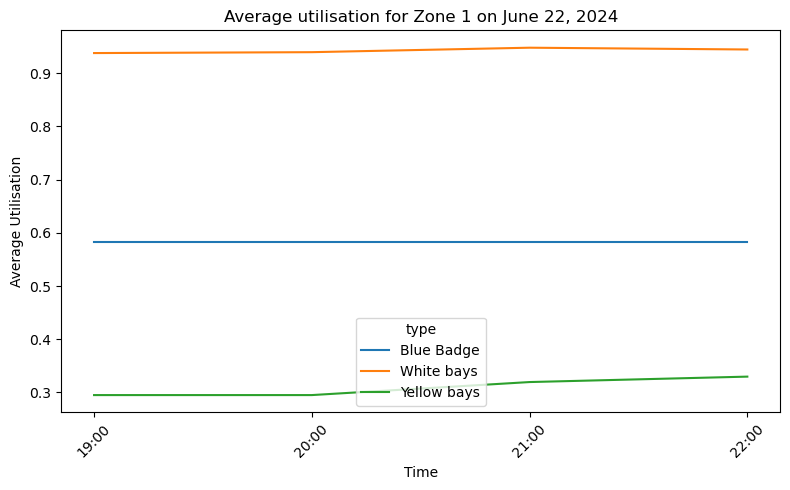

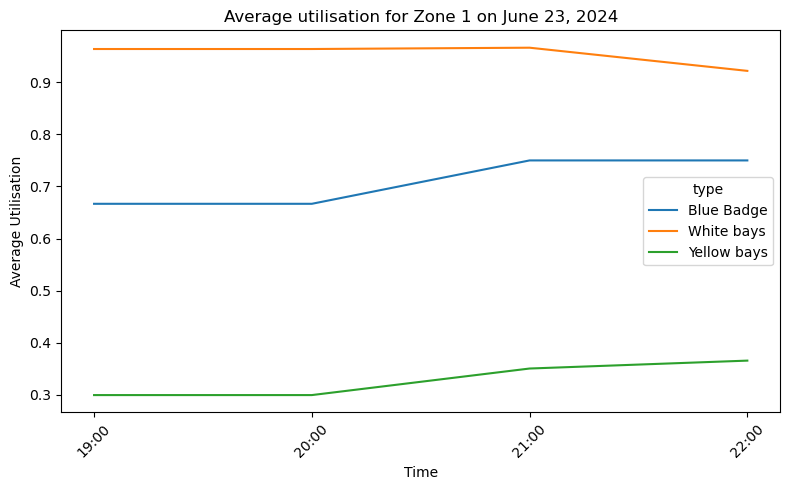

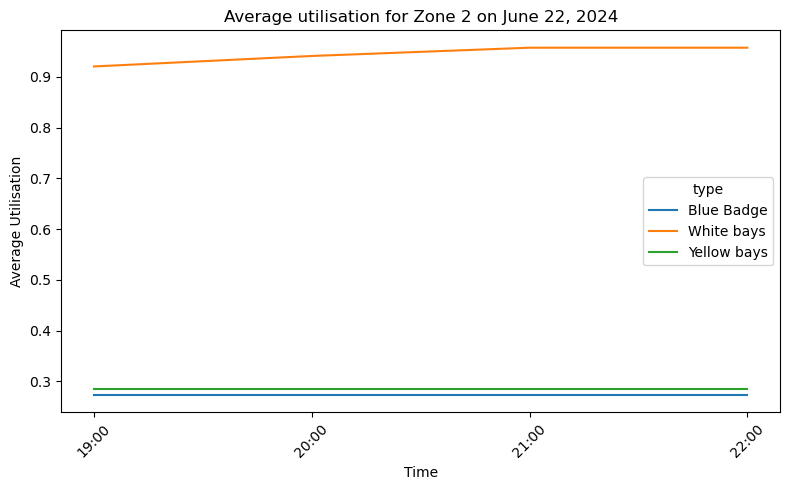

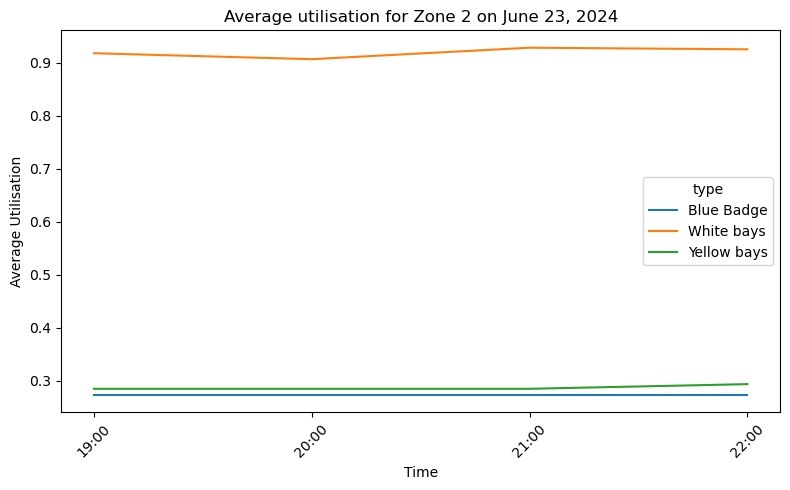

No data available for zone nan on June 22, 2024. Skipping plot.
No data available for zone nan on June 23, 2024. Skipping plot.


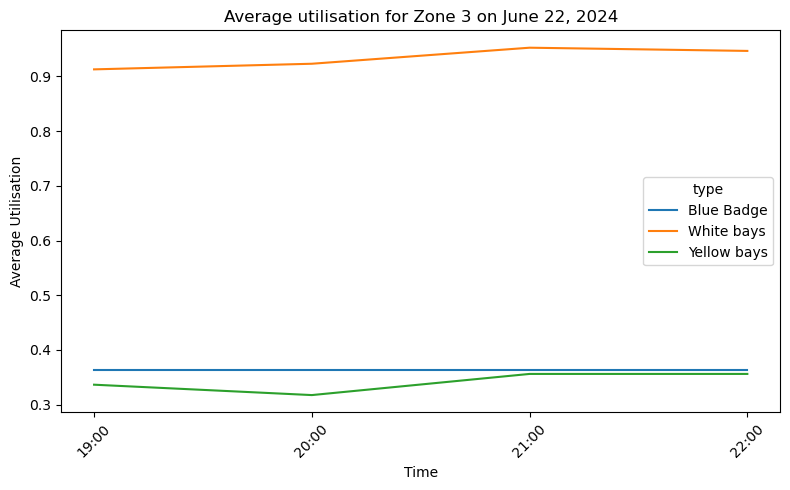

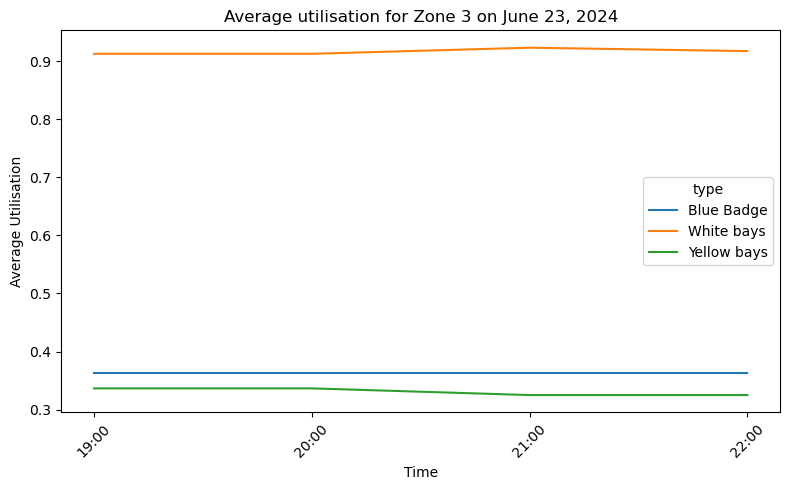

In [11]:
df = df_parkingSpaces

# Replace types with the desired categories
df['type'] = df['type'].replace({
    'white single': 'White bays',
    'white parallel undivided': 'White bays',
    'yellow single': 'Yellow bays',
    'yellow undivided': 'Yellow bays',
    'bluebadge': 'Blue Badge'
})

# Remove 'mc' category
df = df[df['type'] != 'mc']
df = df[df['type'] != 'ev_charging']

# Convert 'timestamp' to datetime if not already done
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Filter data for June 22, 2024
df_22nd = df[(df['timestamp'].dt.date == pd.to_datetime('2024-06-22').date()) &
             (df['timestamp'].dt.hour != 23)]

# Filter data for June 23, 2024
df_23rd = df[df['timestamp'].dt.date == pd.to_datetime('2024-06-23').date()]

# Function to plot the graph for a specific day and zone
def plot_utilisation_per_zone(df_day, day, zone):
    # Filter data for the specific zone
    zone_data = df_day[df_day['Name'] == zone]
    
    if zone_data.empty:
        print(f"No data available for zone {zone} on {day}. Skipping plot.")
        return
    
    avg_utilisation = zone_data.groupby(['type', pd.Grouper(key='timestamp', freq='H')])['utilisation'].mean().reset_index()
    avg_utilisation['Time'] = avg_utilisation['timestamp'].dt.strftime('%H:%M')

    # Plot the data for the specific zone
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=avg_utilisation, x='Time', y='utilisation', hue='type', markers=True, dashes=False)

    # Set labels and title
    plt.title(f'Average utilisation for {zone} on {day}')
    plt.xlabel('Time')
    plt.ylabel('Average Utilisation')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Get the unique zones
zones = df['Name'].unique()

# Loop through each zone and plot for June 22, 2024 and June 23, 2024
for zone in zones:
    # Plot for June 22, 2024
    plot_utilisation_per_zone(df_22nd, 'June 22, 2024', zone)

    # Plot for June 23, 2024
    plot_utilisation_per_zone(df_23rd, 'June 23, 2024', zone)



##

In [38]:
df_allCars = pd.read_csv(csv_allParkedCars)
df_CarsInBaysInZones = pd.read_csv()

,Join_Count,TARGET_FID,Join_Cou_1,TARGET_F_1,type,description,capacity,street_name,locality_name,utilisation,Shape_Leng,Shape_Area,Name,Shape_Le_1,Shape_Ar_1,geometry,timestamp,parking_group
0,1,1,1,1,white-single,white,1.0,Triq It-Tagħlim,ZEJTUN,1.0,2497.037886,195559.986308,Zone 1,15.864846,11.114583,"POLYGON Z ((457654.04509999976 3968215.8049 0,...",2024-06-22 19:00:00,white
1,1,2,1,2,white-single,white,1.0,Triq It-Tagħlim,ZEJTUN,1.0,2497.037886,195559.986308,Zone 1,15.990928,11.507473,POLYGON Z ((457657.0206000004 3968214.87920000...,2024-06-22 19:00:00,white
2,1,3,1,3,white-single,white,1.0,Triq It-Tagħlim,ZEJTUN,1.0,2497.037886,195559.986308,Zone 1,15.924913,11.351753,"POLYGON Z ((457660.07180000003 3968213.9299 0,...",2024-06-22 19:00:00,white
3,1,4,1,4,white-single,white,1.0,Triq It-Tagħlim,ZEJTUN,1.0,2497.037886,195559.986308,Zone 1,16.112719,11.618337,POLYGON Z ((457663.0235000001 3968213.01160000...,2024-06-22 19:00:00,white
4,1,5,1,5,white-single,white,1.0,Triq It-Tagħlim,ZEJTUN,1.0,2497.037886,195559.986308,Zone 1,15.561188,10.806690,"POLYGON Z ((457668.98890000023 3968211.1557 0,...",2024-06-22 19:00:00,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15169,1,1682,1,1682,white-single,white,1.0,Triq Hector Dalli,ZEJTUN,1.0,2497.037886,195559.986308,Zone 1,15.639547,14.004575,POLYGON Z ((457554.9434000002 3968038.71250000...,2024-06-23 22:00:00,white
15170,1,1683,1,1683,white-single,white,1.0,Triq Hector Dalli,ZEJTUN,1.0,2497.037886,195559.986308,Zone 1,16.439598,14.287453,POLYGON Z ((457558.29200000037 3968034.2778999...,2024-06-23 22:00:00,white
15171,1,1684,1,1684,white-single,white,1.0,Triq Hector Dalli,ZEJTUN,1.0,2497.037886,195559.986308,Zone 1,17.585231,16.630900,POLYGON Z ((457563.2242999999 3968031.29140000...,2024-06-23 22:00:00,white
15172,1,1685,1,1685,white-single,white,1.0,Triq Il-Kantur,ZEJTUN,1.0,1875.425895,163953.306197,Zone 2,14.957409,10.206533,POLYGON Z ((457994.42480000015 3967841.1520000...,2024-06-23 22:00:00,white


# Illegal parking

C:\Users\Owner\AppData\Local\Temp\ipykernel_16240\733135448.py:84: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(data=zone_data_melted, x='timestamp', y='count', hue='type', ci=None)
C:\Users\Owner\AppData\Local\Temp\ipykernel_16240\733135448.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels([t.strftime('%H:%M') for t in zone_data['timestamp']])


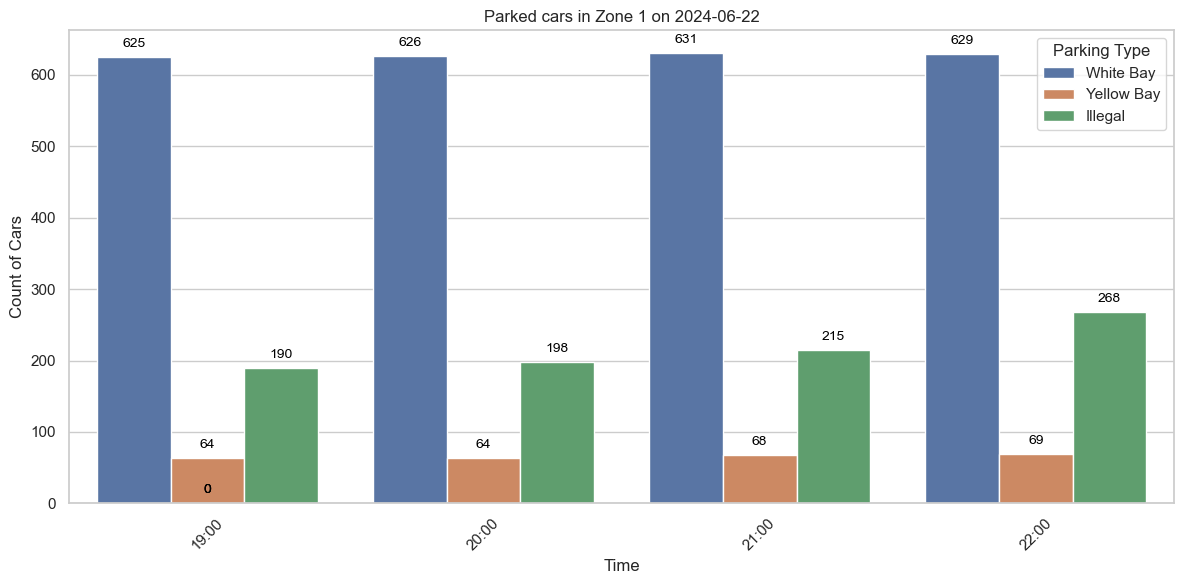

C:\Users\Owner\AppData\Local\Temp\ipykernel_16240\733135448.py:84: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(data=zone_data_melted, x='timestamp', y='count', hue='type', ci=None)
C:\Users\Owner\AppData\Local\Temp\ipykernel_16240\733135448.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels([t.strftime('%H:%M') for t in zone_data['timestamp']])


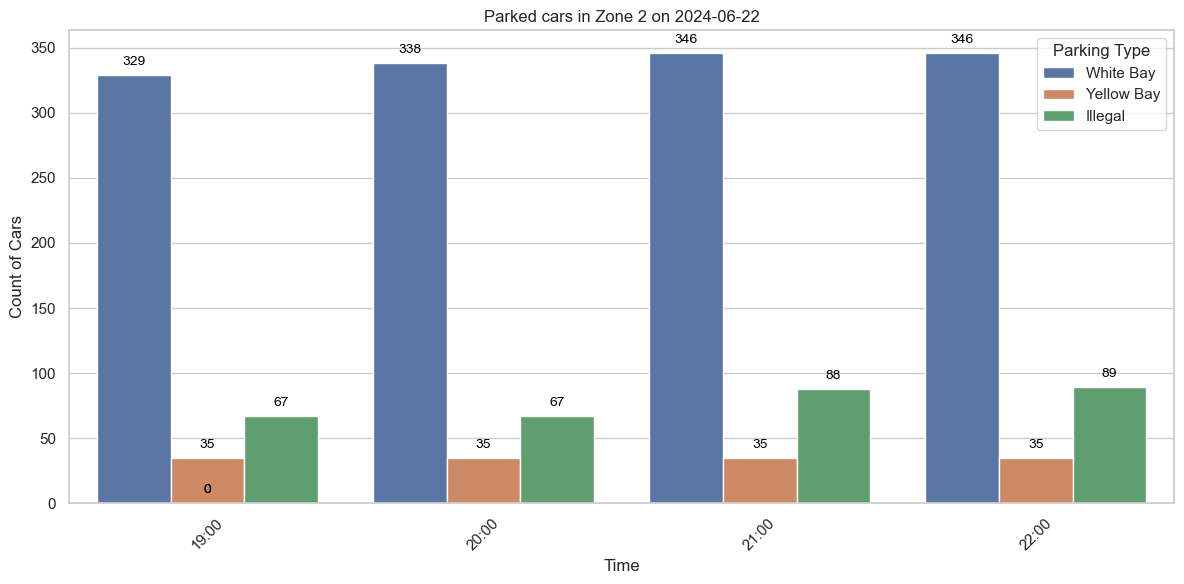

C:\Users\Owner\AppData\Local\Temp\ipykernel_16240\733135448.py:84: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(data=zone_data_melted, x='timestamp', y='count', hue='type', ci=None)
C:\Users\Owner\AppData\Local\Temp\ipykernel_16240\733135448.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels([t.strftime('%H:%M') for t in zone_data['timestamp']])


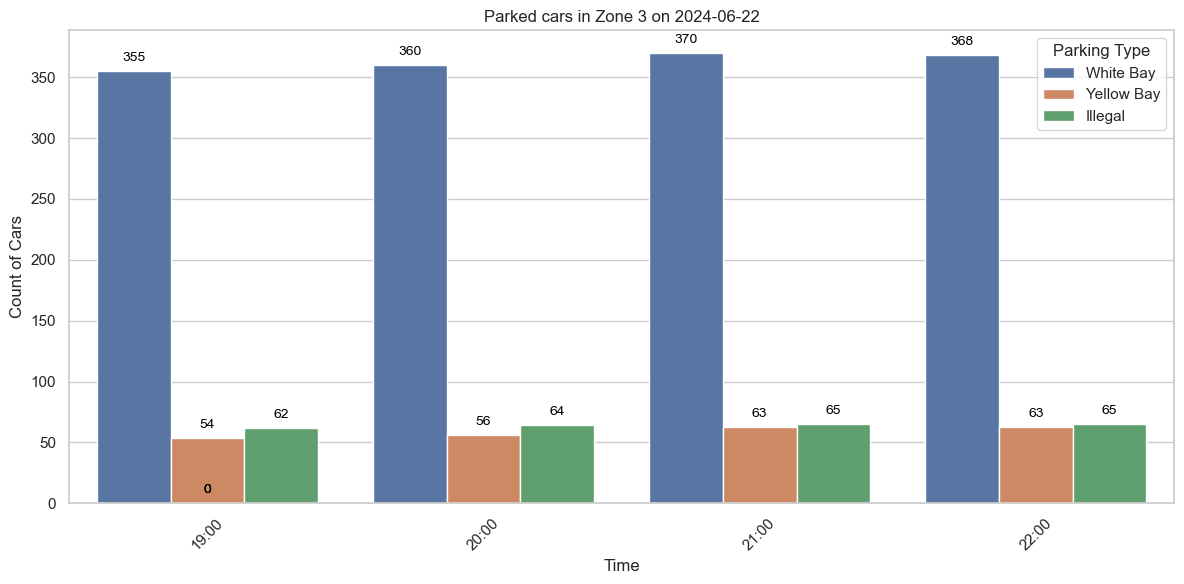

C:\Users\Owner\AppData\Local\Temp\ipykernel_16240\733135448.py:84: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(data=zone_data_melted, x='timestamp', y='count', hue='type', ci=None)
C:\Users\Owner\AppData\Local\Temp\ipykernel_16240\733135448.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels([t.strftime('%H:%M') for t in zone_data['timestamp']])


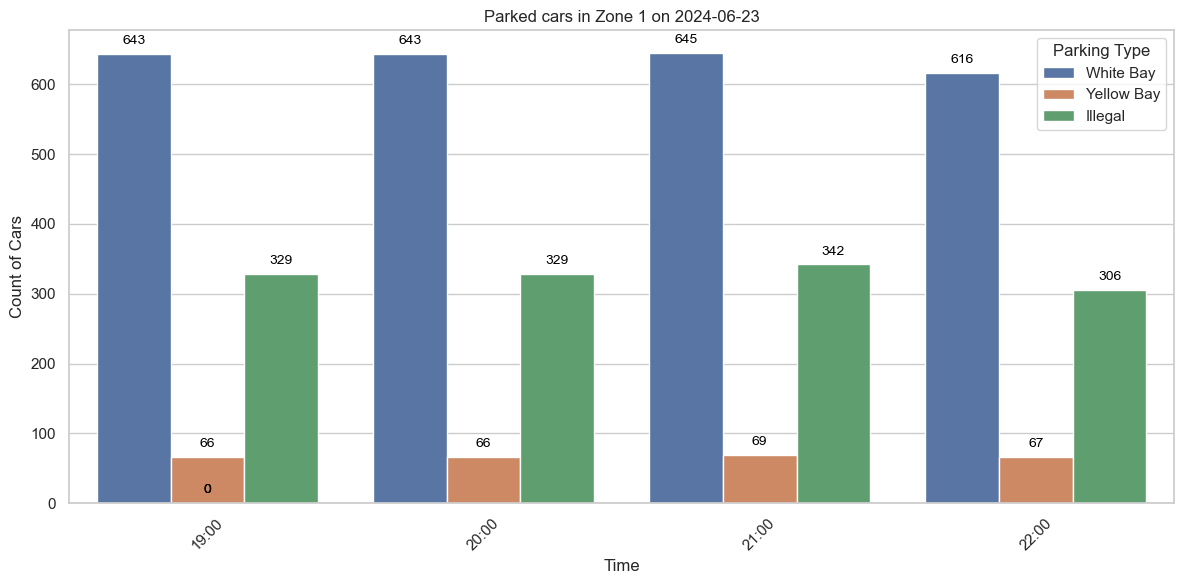

C:\Users\Owner\AppData\Local\Temp\ipykernel_16240\733135448.py:84: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(data=zone_data_melted, x='timestamp', y='count', hue='type', ci=None)
C:\Users\Owner\AppData\Local\Temp\ipykernel_16240\733135448.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels([t.strftime('%H:%M') for t in zone_data['timestamp']])


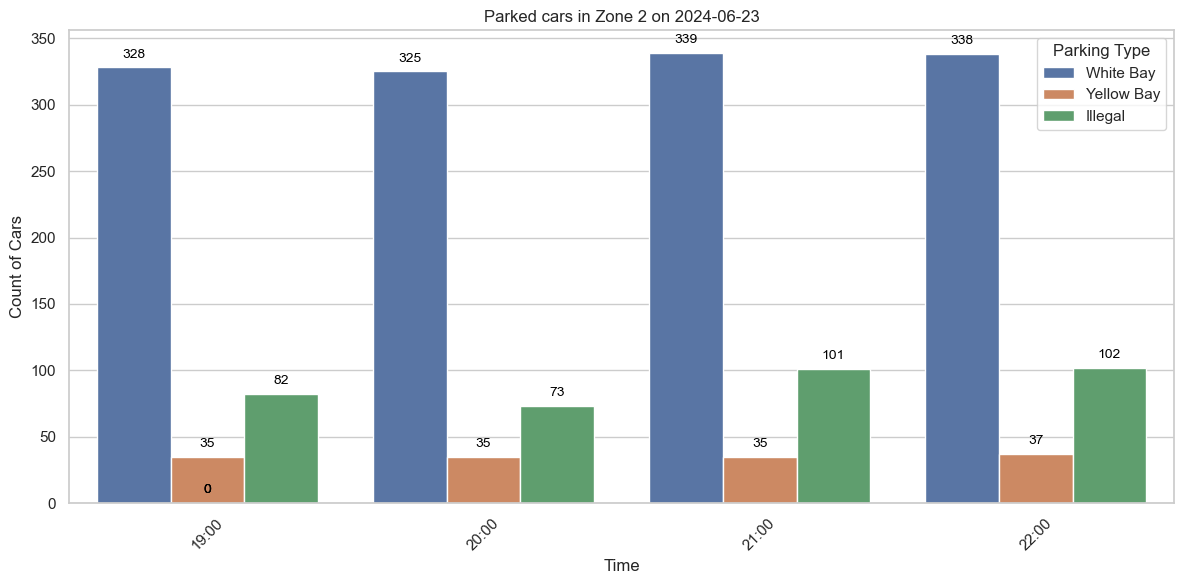

C:\Users\Owner\AppData\Local\Temp\ipykernel_16240\733135448.py:84: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(data=zone_data_melted, x='timestamp', y='count', hue='type', ci=None)
C:\Users\Owner\AppData\Local\Temp\ipykernel_16240\733135448.py:95: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels([t.strftime('%H:%M') for t in zone_data['timestamp']])


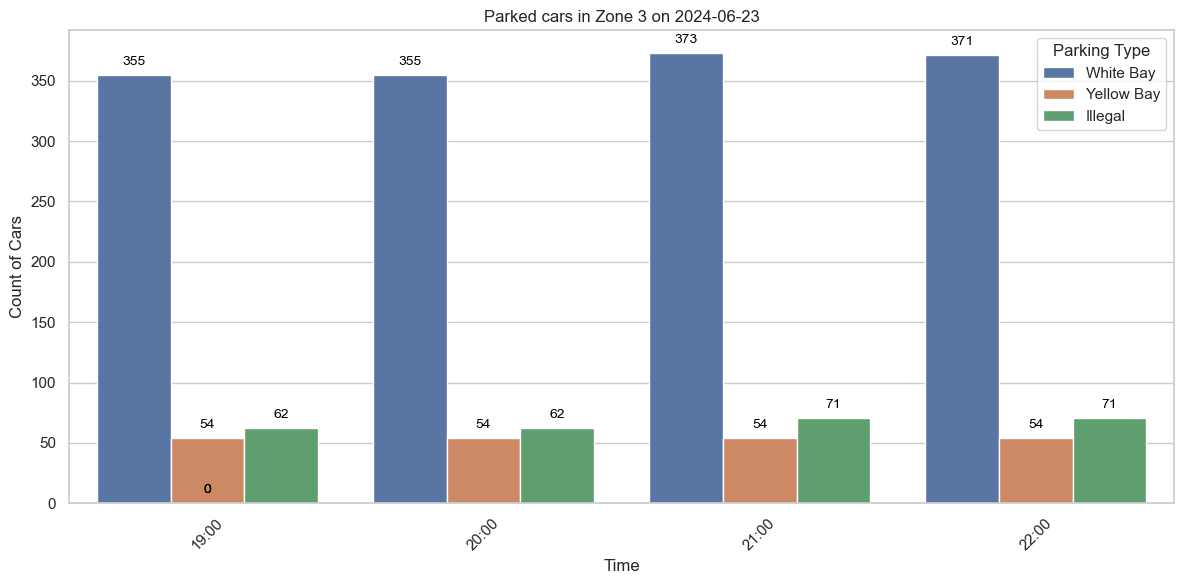

In [42]:
# Load the dataframes
df_capacity = pd.read_csv(r'Calculations\CapacityByZone.csv')
df_cars_in_bay = pd.read_csv(r'Calculations\CarsInBaysWithZones.csv')
df_illegal_cars = pd.read_csv(r'Calculations\IllegalCarsInZone.csv')

# Group the df_cars_in_bay by type and sum CarsInBay
car_type_mapping = {
    'white-single': 'white',
    'white-parallel-undivided': 'white',
    'white-undivided-angled': 'white',
    'yellow-single': 'yellow',
    'yellow-undivided': 'yellow',
    'bluebadge-communal': 'bluebadge',
    'bluebadge-reserved': 'bluebadge'
}

# Add a new column for grouped types
df_cars_in_bay['grouped_type'] = df_cars_in_bay['type'].map(car_type_mapping)

# Group by Name, timestamp, and grouped_type to get the count of cars in each bay type
df_cars_grouped = df_cars_in_bay.groupby(['timestamp', 'Name', 'grouped_type'])['CarsInBay'].sum().reset_index()

# Now, count illegal cars per zone and timestamp
df_illegal_grouped = df_illegal_cars.groupby(['timestamp', 'Name']).size().reset_index(name='illegal_count')

# Merge the two DataFrames to combine cars in bays and illegal counts
df_combined = pd.merge(df_cars_grouped, df_illegal_grouped, on=['timestamp', 'Name'], how='outer')

# Fill NaN values with 0 for cars in bays and illegal counts
df_combined.fillna(0, inplace=True)

# Create separate columns for each parking type, including illegal counts
df_combined_pivot = df_combined.pivot_table(
    index=['timestamp', 'Name'],
    columns='grouped_type',
    values='CarsInBay',
    fill_value=0
).reset_index()

# Rename columns for clarity, ensuring all expected columns exist
df_combined_pivot.columns.name = None  # Remove the column name
df_combined_pivot.rename(columns={
    'white': 'white_count',
    'yellow': 'yellow_count'
}, inplace=True)

# Ensure that all expected columns are present, fill missing ones with zeros
for col in ['white_count', 'yellow_count']:
    if col not in df_combined_pivot.columns:
        df_combined_pivot[col] = 0  # Default to 0 if the column does not exist

# Now, add the illegal parking counts to the pivot table
df_combined_pivot = pd.merge(df_combined_pivot, df_illegal_grouped[['timestamp', 'Name', 'illegal_count']], on=['timestamp', 'Name'], how='left')

# Filter for the specific dates
df_combined_pivot['timestamp'] = pd.to_datetime(df_combined_pivot['timestamp'])
df_filtered = df_combined_pivot[(df_combined_pivot['timestamp'].dt.date == pd.to_datetime('2024-06-22').date()) |
                                 (df_combined_pivot['timestamp'].dt.date == pd.to_datetime('2024-06-23').date())]

# Set up the seaborn style
sns.set_theme(style="whitegrid")

# Create the clustered bar chart for each Zone and each date separately
for date in ['2024-06-22', '2024-06-23']:
    date_data = df_filtered[df_filtered['timestamp'].dt.date == pd.to_datetime(date).date()]
    
    for zone in date_data['Name'].unique():
        zone_data = date_data[date_data['Name'] == zone]
        
        # Melt the DataFrame to prepare for plotting
        zone_data_melted = zone_data.melt(id_vars=['timestamp', 'Name'],
                                            value_vars=['white_count', 'yellow_count', 'illegal_count'],
                                            var_name='type',
                                            value_name='count')
               # Remove rows with count zero
        zone_data_melted = zone_data_melted[zone_data_melted['count'] > 0]


        plt.figure(figsize=(12, 6))
        bar_plot = sns.barplot(data=zone_data_melted, x='timestamp', y='count', hue='type', ci=None)

        # Rename legend labels
        bar_plot.legend(title='Parking Type', labels=['White Bay', 'Yellow Bay', 'Illegal'])

        # Set the title with the date
        plt.title(f'Parked cars in {zone} on {date}')
        plt.xlabel('Time')
        plt.ylabel('Count of Cars')

        # Format x-axis to show only hours
        bar_plot.set_xticklabels([t.strftime('%H:%M') for t in zone_data['timestamp']])
        plt.xticks(rotation=45)

        # Add count labels on each bar
        for p in bar_plot.patches:
            bar_plot.annotate(format(int(p.get_height())), 
                               (p.get_x() + p.get_width() / 2., p.get_height()), 
                               ha='center', va='bottom', 
                               fontsize=10, color='black', 
                               xytext=(0, 5), 
                               textcoords='offset points')

        plt.tight_layout()
        plt.show()
